In [1]:
#install sklearn 
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

In [2]:
data=load_wine()

In [3]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Z score

In [10]:
df1=df['proline']


In [12]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x20d254bba90>,
 'caps': [<matplotlib.lines.Line2D at 0x20d254c2650>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d254b97d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d254c4650>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d254c6c10>],
 'means': []}

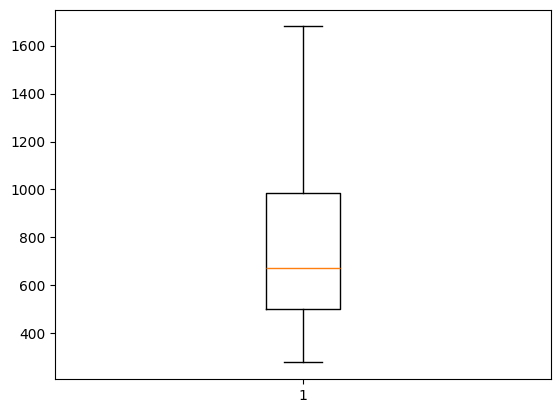

In [14]:
plt.boxplot(df1)

In [8]:
df1[len(df1)-1]=200000

## Check the outlier

#### => Before removing outlier

<Axes: ylabel='proline'>

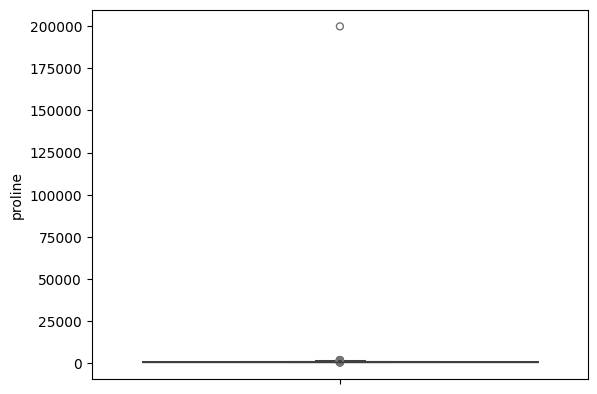

In [9]:
sns.boxenplot(df1)

#### Get outliers using Z score

In [10]:
import numpy as np

Outliers=[]
def Check_Outlier(data):
    mean_x=np.mean(data)
    std_x=np.std(data)
    threshold=3
    for i in data:
        z_score=(i-mean_x)/std_x
        if np.abs(z_score)>threshold:
            Outliers.append(i)
    return Outliers

sampleOutlier=Check_Outlier(df1)
print(sampleOutlier)        

[200000.0]


#### Remove the outlier

In [11]:
df1=list(df1)
for i in df1:
    for j in sampleOutlier:
        if i==j:
            df1.remove(i)
            
df1  

[1065.0,
 1050.0,
 1185.0,
 1480.0,
 735.0,
 1450.0,
 1290.0,
 1295.0,
 1045.0,
 1045.0,
 1510.0,
 1280.0,
 1320.0,
 1150.0,
 1547.0,
 1310.0,
 1280.0,
 1130.0,
 1680.0,
 845.0,
 780.0,
 770.0,
 1035.0,
 1015.0,
 845.0,
 830.0,
 1195.0,
 1285.0,
 915.0,
 1035.0,
 1285.0,
 1515.0,
 990.0,
 1235.0,
 1095.0,
 920.0,
 880.0,
 1105.0,
 1020.0,
 760.0,
 795.0,
 1035.0,
 1095.0,
 680.0,
 885.0,
 1080.0,
 1065.0,
 985.0,
 1060.0,
 1260.0,
 1150.0,
 1265.0,
 1190.0,
 1375.0,
 1060.0,
 1120.0,
 970.0,
 1270.0,
 1285.0,
 520.0,
 680.0,
 450.0,
 630.0,
 420.0,
 355.0,
 678.0,
 502.0,
 510.0,
 750.0,
 718.0,
 870.0,
 410.0,
 472.0,
 985.0,
 886.0,
 428.0,
 392.0,
 500.0,
 750.0,
 463.0,
 278.0,
 714.0,
 630.0,
 515.0,
 520.0,
 450.0,
 495.0,
 562.0,
 680.0,
 625.0,
 480.0,
 450.0,
 495.0,
 290.0,
 345.0,
 937.0,
 625.0,
 428.0,
 660.0,
 406.0,
 710.0,
 562.0,
 438.0,
 415.0,
 672.0,
 315.0,
 510.0,
 488.0,
 312.0,
 680.0,
 562.0,
 325.0,
 607.0,
 434.0,
 385.0,
 407.0,
 495.0,
 345.0,
 372.0,
 564.

#### After removing outlier

<Axes: >

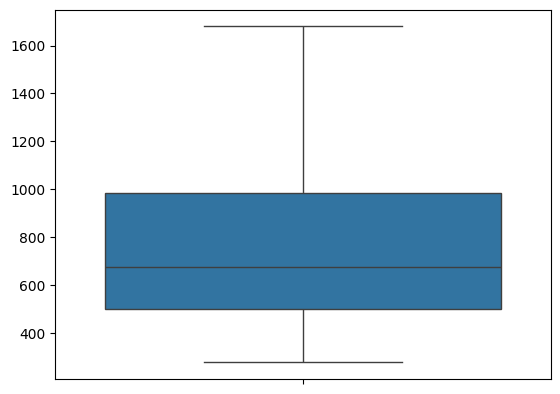

In [12]:
sns.boxplot(df1)

# IQR

In [39]:
df2=df['malic_acid']
df2=pd.DataFrame(df2)
df2

,malic_acid
0,1.71
1,1.78
2,2.36
3,1.95
4,2.59
...,...
173,5.65
174,3.91
175,4.28
176,2.59


<Axes: >

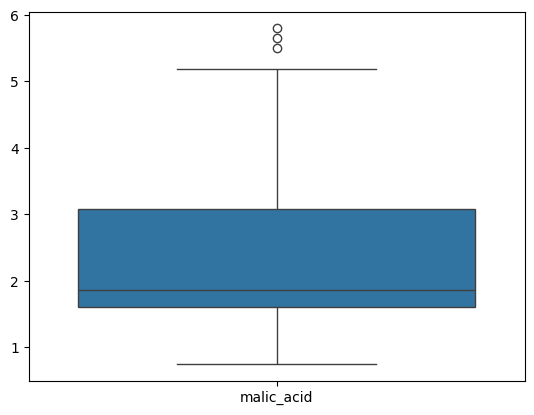

In [40]:
sns.boxplot(df2)

In [41]:
q1=np.quantile(df2['malic_acid'],0.25)
q3=np.quantile(df2['malic_acid'],0.75)
IQR=q3-q1
Lb=q1-(1.5*IQR)
Ub=q3+(1.5*IQR)

for i in df2['malic_acid']:
    if i<Lb or i>Ub:
        df2=df2.replace(i,np.median(df2['malic_acid']))

<Axes: >

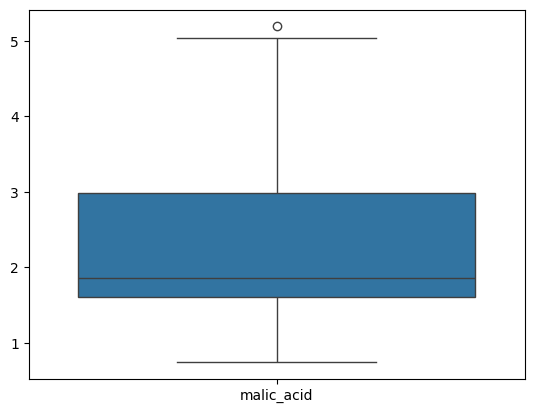

In [42]:
sns.boxplot(df2)

# Rempove outliers using function

In [44]:
df.clip(df.quantile(0.1),df.quantile(0.9),axis=1,inplace=True)


<Axes: >

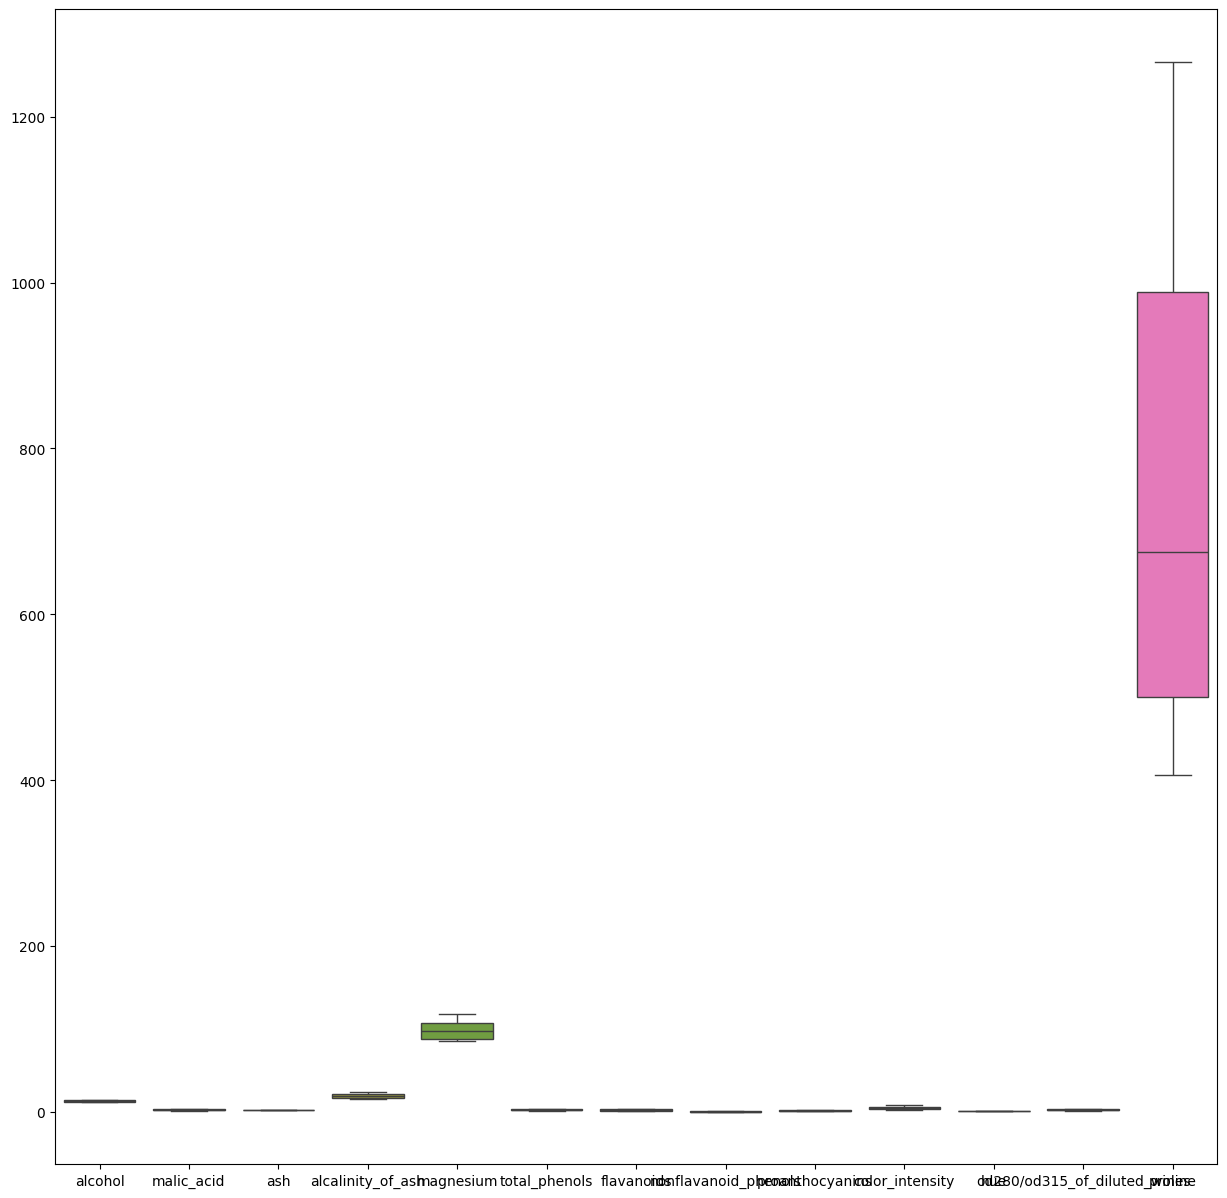

In [49]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,15))
sns.boxplot(df)